In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[]

In [11]:
from pandas import read_csv
#Load data set
series_influ_A_df = read_csv('../temp_data/influA_vietnam.csv', usecols=[1,2,3], engine='python')
# series_influ_A_df = series_influ_A_df["Influenza A - All types of surveillance"]
series_influ_A_df = series_influ_A_df.dropna()
series_influ_A_df = series_influ_A_df.astype('float32')
series_influ_A_df = series_influ_A_df.values
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(series_influ_A_df)
# Create Training and Test
train = dataset[:735, :]
test = dataset[735:, :]

In [2]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [3]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [5]:
print(trainX[0])
# reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


[[0.08536585 0.38735178 0.6863711 ]
 [0.         0.21739128 0.2906404 ]]


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(2, 3)))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


d:\my_study\gr3\DATN\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


732/732 - 2s - 3ms/step - loss: 0.0674
Epoch 2/100
732/732 - 1s - 1ms/step - loss: 0.0284
Epoch 3/100
732/732 - 1s - 1ms/step - loss: 0.0248
Epoch 4/100
732/732 - 1s - 1ms/step - loss: 0.0216
Epoch 5/100
732/732 - 1s - 1ms/step - loss: 0.0192
Epoch 6/100
732/732 - 1s - 1ms/step - loss: 0.0179
Epoch 7/100
732/732 - 1s - 1ms/step - loss: 0.0170
Epoch 8/100
732/732 - 1s - 1ms/step - loss: 0.0166
Epoch 9/100
732/732 - 1s - 1ms/step - loss: 0.0163
Epoch 10/100
732/732 - 1s - 1ms/step - loss: 0.0160
Epoch 11/100
732/732 - 1s - 1ms/step - loss: 0.0159
Epoch 12/100
732/732 - 1s - 1ms/step - loss: 0.0158
Epoch 13/100
732/732 - 1s - 1ms/step - loss: 0.0158
Epoch 14/100
732/732 - 1s - 1ms/step - loss: 0.0157
Epoch 15/100
732/732 - 1s - 1ms/step - loss: 0.0158
Epoch 16/100
732/732 - 1s - 1ms/step - loss: 0.0157
Epoch 17/100
732/732 - 1s - 1ms/step - loss: 0.0157
Epoch 18/100
732/732 - 1s - 1ms/step - loss: 0.0157
Epoch 19/100
732/732 - 1s - 1ms/step - loss: 0.0156
Epoch 20/100
732/732 - 1s - 1ms/s

In [5]:
from sklearn.metrics import mean_squared_error
# make predictions
testPredict = model.predict(testX)
# invert predictions
testPredict = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform(testY)
# print(testPredict[:,0], testY_[0])
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(testY_, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Test Score: 6.92 RMSE


In [7]:
print(len(dataset))

792


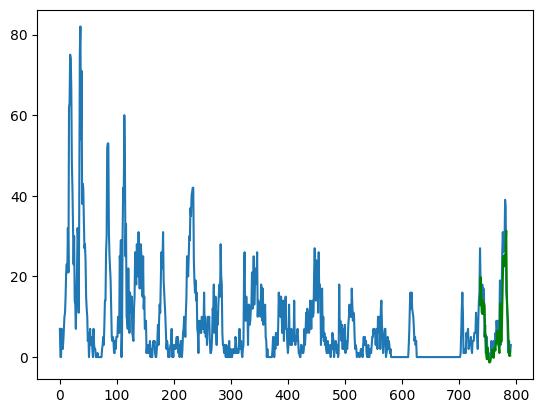

In [24]:
import matplotlib.pyplot as plt
# (x,3)
testPredictPlot = np.empty([dataset.shape[0]])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainX)+(look_back*2)+1:len(dataset)-1] = testPredict[:,0].reshape(-1)
plt.plot(scaler.inverse_transform(dataset)[:,0].reshape(-1))
plt.plot(testPredictPlot, color = 'green')
plt.show()

In [23]:
model.save("../model/LSTM_3_3.keras")